In [1]:
from chesslab.agent_torch import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

In [2]:
import torch.nn as nn
import torch
class Model_2(nn.Module):

    def __init__(self):
        super(Model_2,self).__init__()
        self.func_1=nn.ReLU()
        self.func_2=nn.ReLU()
        self.func_3=nn.ReLU()
        self.func_4=nn.ReLU()
        
        self.cnn_1 = nn.Conv2d(4, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = torch.flatten(out, start_dim=1)
        #out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_2()

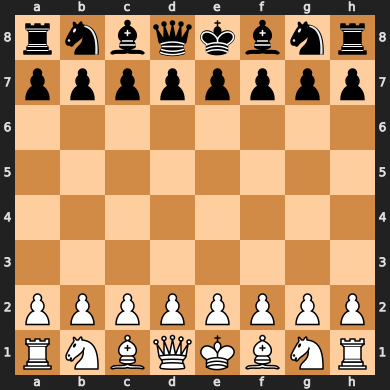

In [3]:
board=chess.Board()
board

In [4]:
base_name = '../tmp/torch_relu/torch_weights.0.{}.pt'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('g1f3')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.5198743 , 0.62660325, 0.5804196 , 0.57672906, 0.5917651 ,
       0.5550014 , 0.5740736 , 0.50685   , 0.53343356, 0.52855015,
       0.53125066, 0.58435553, 0.58234835, 0.57301444, 0.5120455 ,
       0.5884493 , 0.5980851 , 0.5572722 , 0.53020144, 0.57661766],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('g1f3'), 0.6266032457351685],
       [Move.from_uci('d2d4'), 0.5980851054191589],
       [Move.from_uci('h2h3'), 0.5917651057243347],
       [Move.from_uci('e2e4'), 0.5884492993354797],
       [Move.from_uci('a2a3'), 0.5843555331230164],
       [Move.from_uci('h2h4'), 0.5823483467102051],
       [Move.from_uci('b1c3'), 0.5804196000099182],
       [Move.from_uci('b1a3'), 0.5767290592193604],
       [Move.from_uci('a2a4'), 0.5766176581382751],
       [Move.from_uci('f2f3'), 0.5740736126899719],
       [Move.from_uci('g2g4'), 0.5730144381523132],
       [Move.from_uci('c2c4'), 0.55727219581604],
       [Move.from_uci('g2g3'), 0.5550013780593872],
       [Move.from_uci('d2d3'), 0.5334335565567017],
       [Move.from_uci('b2b3'), 0.5312506556510925],
       [Move.from_uci('b2b4'), 0.5302014350891113],
       [Move.from_uci('c2c3'), 0.5285501480102539],
       [Move.from_uci('g1h3'), 0.5198742747306824],
       [Move.from_uci('f2f4'), 0.5120455026626587],
       [Move.f

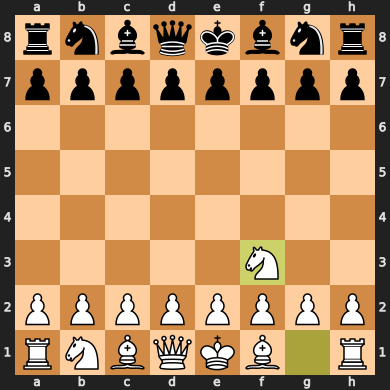

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.12

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 3/25 = 0.12 | weighted = 0.72
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 2 & 48 & 0.9787 & 0.8057 & b4e7 & 0.8315  \\
02 & f5d4 & 39 & 39 & 0.0000 & 0.3549 & a5d5 & 0.6553  \\
03 & e1d1 & 11 & 38 & 0.7297 & 0.8018 & e1e6 & 0.8635  \\
04 & b1b2 & 24 & 47 & 0.5000 & 0.5700 & c2b4 & 0.8307  \\
05 & g5c1 & 24 & 48 & 0.5106 & 0.3415 & c8c3 & 0.6645  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.4484 & b6b5 & 0.4605  \\
07 & b7e4 & 3 & 33 & 0.9375 & 0.3414 & d7e5 & 0.3779  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.3022 & b6d5 & 0.6175  \\
09 & f3e2 & 7 & 35 & 0.8235 & 0.7762 & h1g1 & 0.8226  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.4885 & c7h2 & 0.4994  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9828 & g3f5 & 0.9828  \\
12 & c6d6 & 29 & 41 & 0.3000 & 0.0707 & e7e4 & 0.3079  \\
13 & c3d5 & 4 & 30 & 0.8966 & 0.7760 & f1f6 & 0.9207  \\
14 & b1b2 & 4 & 49 & 0.9375 & 0.8962 & h6f4 & 0.9139  \\
15 & d3f5 & 3 & 51 & 0.9600 & 0.7245 & e1e6 & 0.7617  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.2869 & d

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.805664,b4e7,0.831486,2,48,0.978723
1,f5d4,0.354883,a5d5,0.655350,39,39,0.000000
2,e1d1,0.801808,e1e6,0.863519,11,38,0.729730
3,b1b2,0.569985,c2b4,0.830679,24,47,0.500000
4,g5c1,0.341498,c8c3,0.664458,24,48,0.510638
5,a3a2,0.448434,b6b5,0.460455,2,31,0.966667
6,b7e4,0.341375,d7e5,0.377862,3,33,0.937500
7,h7h6,0.302185,b6d5,0.617490,16,39,0.605263
8,f3e2,0.776221,h1g1,0.822648,7,35,0.823529
9,d5c3,0.488526,c7h2,0.499415,2,41,0.975000


In [12]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,data  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    
    if i<5:
        print("*"*80)
        print("Modelo {}".format(i))
        print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
        print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
        for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
            print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
        display(pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"]))
train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


device: cuda
********************************************************************************
Modelo 1
Accuracy: 3/25 = 0.12 | weighted = 0.72
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 2 & 48 & 0.9787 & 0.8057 & b4e7 & 0.8315  \\
02 & f5d4 & 39 & 39 & 0.0000 & 0.3549 & a5d5 & 0.6553  \\
03 & e1d1 & 11 & 38 & 0.7297 & 0.8018 & e1e6 & 0.8635  \\
04 & b1b2 & 24 & 47 & 0.5000 & 0.5700 & c2b4 & 0.8307  \\
05 & g5c1 & 24 & 48 & 0.5106 & 0.3415 & c8c3 & 0.6645  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.4484 & b6b5 & 0.4605  \\
07 & b7e4 & 3 & 33 & 0.9375 & 0.3414 & d7e5 & 0.3779  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.3022 & b6d5 & 0.6175  \\
09 & f3e2 & 7 & 35 & 0.8235 & 0.7762 & h1g1 & 0.8226  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.4885 & c7h2 & 0.4994  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9828 & g3f5 & 0.9828  \\
12 & c6d6 & 29 & 41 & 0.3000 & 0.0707 & e7e4 & 0.3079  \\
13 & c3d5 & 4 & 30 & 0.8966 & 0.7760 & f1f6 & 0.9207  \\
14 & b1b2 & 4 & 49 & 0.9375 & 0.8962 & h6f4 & 0.913

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.805664,b4e7,0.831486,2,48,0.978723
1,f5d4,0.354883,a5d5,0.655350,39,39,0.000000
2,e1d1,0.801808,e1e6,0.863519,11,38,0.729730
3,b1b2,0.569985,c2b4,0.830679,24,47,0.500000
4,g5c1,0.341498,c8c3,0.664458,24,48,0.510638
5,a3a2,0.448434,b6b5,0.460455,2,31,0.966667
6,b7e4,0.341375,d7e5,0.377862,3,33,0.937500
7,h7h6,0.302185,b6d5,0.617490,16,39,0.605263
8,f3e2,0.776221,h1g1,0.822648,7,35,0.823529
9,d5c3,0.488526,c7h2,0.499415,2,41,0.975000


device: cuda
********************************************************************************
Modelo 2
Accuracy: 4/25 = 0.16 | weighted = 0.67
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 2 & 48 & 0.9787 & 0.7484 & f2f3 & 0.7543  \\
02 & f5d4 & 19 & 39 & 0.5263 & 0.3942 & d7d4 & 0.6152  \\
03 & e1d1 & 16 & 38 & 0.5946 & 0.7234 & g2g4 & 0.8170  \\
04 & b1b2 & 21 & 47 & 0.5652 & 0.6379 & e2d4 & 0.7687  \\
05 & g5c1 & 4 & 48 & 0.9362 & 0.6701 & c8c3 & 0.7160  \\
06 & a3a2 & 4 & 31 & 0.9000 & 0.2979 & a3b3 & 0.3497  \\
07 & b7e4 & 30 & 33 & 0.0938 & 0.3424 & c7c4 & 0.5898  \\
08 & h7h6 & 9 & 39 & 0.7895 & 0.2910 & f8f3 & 0.4837  \\
09 & f3e2 & 10 & 35 & 0.7353 & 0.6924 & d2h6 & 0.7713  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.5493 & d5c3 & 0.5493  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9504 & g3f5 & 0.9504  \\
12 & c6d6 & 16 & 41 & 0.6250 & 0.1883 & e7e1 & 0.3450  \\
13 & c3d5 & 5 & 30 & 0.8621 & 0.7017 & f1f6 & 0.8524  \\
14 & b1b2 & 38 & 49 & 0.2292 & 0.7186 & d3f5 & 0.87

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.748423,f2f3,0.754325,2,48,0.978723
1,f5d4,0.394225,d7d4,0.615211,19,39,0.526316
2,e1d1,0.723360,g2g4,0.816961,16,38,0.594595
3,b1b2,0.637946,e2d4,0.768702,21,47,0.565217
4,g5c1,0.670067,c8c3,0.715963,4,48,0.936170
5,a3a2,0.297899,a3b3,0.349675,4,31,0.900000
6,b7e4,0.342412,c7c4,0.589820,30,33,0.093750
7,h7h6,0.290997,f8f3,0.483681,9,39,0.789474
8,f3e2,0.692416,d2h6,0.771322,10,35,0.735294
9,d5c3,0.549339,d5c3,0.549339,1,41,1.000000


device: cuda
********************************************************************************
Modelo 3
Accuracy: 6/25 = 0.24 | weighted = 0.71
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 4 & 48 & 0.9362 & 0.7594 & c1c6 & 0.7884  \\
02 & f5d4 & 24 & 39 & 0.3947 & 0.4537 & a5d2 & 0.7290  \\
03 & e1d1 & 15 & 38 & 0.6216 & 0.6157 & f2c5 & 0.7722  \\
04 & b1b2 & 16 & 47 & 0.6739 & 0.6862 & e2c3 & 0.8026  \\
05 & g5c1 & 9 & 48 & 0.8298 & 0.6476 & c8c3 & 0.7653  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5490 & a3a2 & 0.5490  \\
07 & b7e4 & 14 & 33 & 0.5938 & 0.3134 & c7c4 & 0.4408  \\
08 & h7h6 & 12 & 39 & 0.7105 & 0.3578 & f8f3 & 0.5636  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.7255 & d2h6 & 0.7644  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.6200 & d5c3 & 0.6200  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9489 & g3f5 & 0.9489  \\
12 & c6d6 & 41 & 41 & 0.0000 & 0.1161 & e7e5 & 0.4227  \\
13 & c3d5 & 1 & 30 & 1.0000 & 0.7134 & c3d5 & 0.7134  \\
14 & b1b2 & 23 & 49 & 0.5417 & 0.7122 & d3f5 & 0.87

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.759363,c1c6,0.788448,4,48,0.936170
1,f5d4,0.453669,a5d2,0.729048,24,39,0.394737
2,e1d1,0.615739,f2c5,0.772210,15,38,0.621622
3,b1b2,0.686223,e2c3,0.802641,16,47,0.673913
4,g5c1,0.647589,c8c3,0.765256,9,48,0.829787
5,a3a2,0.549000,a3a2,0.549000,1,31,1.000000
6,b7e4,0.313407,c7c4,0.440789,14,33,0.593750
7,h7h6,0.357758,f8f3,0.563613,12,39,0.710526
8,f3e2,0.725470,d2h6,0.764412,8,35,0.794118
9,d5c3,0.619958,d5c3,0.619958,1,41,1.000000


device: cuda
********************************************************************************
Modelo 4
Accuracy: 6/25 = 0.24 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 0.7619 & e4f6 & 0.7619  \\
02 & f5d4 & 34 & 39 & 0.1316 & 0.3934 & a5d2 & 0.7798  \\
03 & e1d1 & 12 & 38 & 0.7027 & 0.5543 & f2c5 & 0.7305  \\
04 & b1b2 & 11 & 47 & 0.7826 & 0.7163 & e2c3 & 0.8086  \\
05 & g5c1 & 5 & 48 & 0.9149 & 0.5721 & g5b5 & 0.6436  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.2221 & a3b3 & 0.2307  \\
07 & b7e4 & 7 & 33 & 0.8125 & 0.4023 & c7c4 & 0.5215  \\
08 & h7h6 & 21 & 39 & 0.4737 & 0.1801 & b6d5 & 0.4091  \\
09 & f3e2 & 3 & 35 & 0.9412 & 0.7952 & e5e6 & 0.8617  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.5874 & d5c3 & 0.5874  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9707 & g3f5 & 0.9707  \\
12 & c6d6 & 41 & 41 & 0.0000 & 0.0472 & e7e2 & 0.2872  \\
13 & c3d5 & 1 & 30 & 1.0000 & 0.9164 & c3d5 & 0.9164  \\
14 & b1b2 & 10 & 49 & 0.8125 & 0.7594 & d3g6 & 0.9105

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.761874,e4f6,0.761874,1,48,1.000000
1,f5d4,0.393435,a5d2,0.779811,34,39,0.131579
2,e1d1,0.554302,f2c5,0.730460,12,38,0.702703
3,b1b2,0.716277,e2c3,0.808627,11,47,0.782609
4,g5c1,0.572078,g5b5,0.643623,5,48,0.914894
5,a3a2,0.222089,a3b3,0.230738,2,31,0.966667
6,b7e4,0.402289,c7c4,0.521539,7,33,0.812500
7,h7h6,0.180097,b6d5,0.409149,21,39,0.473684
8,f3e2,0.795220,e5e6,0.861733,3,35,0.941176
9,d5c3,0.587411,d5c3,0.587411,1,41,1.000000


device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda


In [13]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 3/25 = 0.12 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 13 & 48 & 0.7447 & 0.0656 & e4d6 & 0.9621  \\
02 & f5d4 & 38 & 39 & 0.0263 & 0.6088 & h7h5 & 1.0000  \\
03 & e1d1 & 23 & 38 & 0.4054 & 0.9957 & e1e6 & 1.0000  \\
04 & b1b2 & 9 & 47 & 0.8261 & 0.9991 & d2d5 & 1.0000  \\
05 & g5c1 & 8 & 48 & 0.8511 & 0.9610 & g5g2 & 0.9996  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.9965 & a3a2 & 0.9965  \\
07 & b7e4 & 6 & 33 & 0.8438 & 0.1459 & d7c5 & 0.7284  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.2072 & e1c1 & 0.9999  \\
09 & f3e2 & 6 & 35 & 0.8529 & 1.0000 & h1g1 & 1.0000  \\
10 & d5c3 & 5 & 41 & 0.9000 & 0.9999 & a7a6 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 21 & 41 & 0.5000 & 0.0000 & e7e4 & 0.0200  \\
13 & c3d5 & 4 & 30 & 0.8966 & 1.0000 & g1g2 & 1.0000  \\
14 & b1b2 & 22 & 49 & 0.5625 & 0.8669 & h2h4 & 1.0000  \\
15 & d3f5 & 2 & 51 & 0.9800 & 1.0000 & d3f1 & 1.0000  \\
16 & b3b4 & 4 & 10 & 0.6667 & 0.0303 & d2

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,6.561177e-02,e4d6,9.621284e-01,13,48,0.744681
1,f5d4,6.087807e-01,h7h5,1.000000e+00,38,39,0.026316
2,e1d1,9.956660e-01,e1e6,1.000000e+00,23,38,0.405405
3,b1b2,9.990857e-01,d2d5,9.999675e-01,9,47,0.826087
4,g5c1,9.610356e-01,g5g2,9.995951e-01,8,48,0.851064
5,a3a2,9.964637e-01,a3a2,9.964637e-01,1,31,1.000000
6,b7e4,1.458571e-01,d7c5,7.283988e-01,6,33,0.843750
7,h7h6,2.071620e-01,e1c1,9.999181e-01,11,39,0.736842
8,f3e2,9.999925e-01,h1g1,9.999999e-01,6,35,0.852941
9,d5c3,9.998763e-01,a7a6,9.999998e-01,5,41,0.900000


In [16]:
path = 'D:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


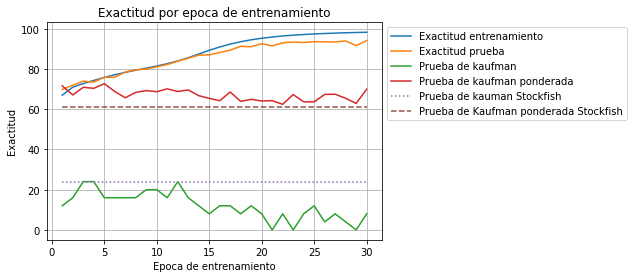

In [17]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [18]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 66.96 & 69.79 & 12.00 & 71.60 \\
02 & 70.94 & 71.91 & 16.00 & 67.06 \\
03 & 72.73 & 73.93 & 24.00 & 70.87 \\
04 & 74.28 & 73.43 & 24.00 & 70.36 \\
05 & 75.76 & 75.87 & 16.00 & 72.67 \\
06 & 77.09 & 75.88 & 16.00 & 68.79 \\
07 & 78.27 & 78.48 & 16.00 & 65.68 \\
08 & 79.37 & 79.57 & 16.00 & 68.35 \\
09 & 80.38 & 79.92 & 20.00 & 69.23 \\
10 & 81.44 & 81.08 & 20.00 & 68.68 \\
11 & 82.60 & 82.20 & 16.00 & 70.09 \\
12 & 83.95 & 83.86 & 24.00 & 68.80 \\
13 & 85.57 & 85.35 & 16.00 & 69.55 \\
14 & 87.39 & 86.85 & 12.00 & 66.71 \\
15 & 89.24 & 87.02 & 8.00 & 65.37 \\
16 & 90.90 & 88.17 & 12.00 & 64.20 \\
17 & 92.34 & 89.34 & 12.00 & 68.52 \\
18 & 93.51 & 91.21 & 8.00 & 63.86 \\
19 & 94.47 & 91.04 & 12.00 & 64.90 \\
20 & 95.25 & 92.55 & 8.00 & 64.07 \\
21 & 95.85 & 91.48 & 0.00 & 64.23 \\
22 & 96.38 & 92.99 & 8.00 & 62.41 \\
23 & 96.77 & 93.38 & 0.00 & 67.26 \\
24 & 97.10 &

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.669585,0.697925,0.12,0.715969
2,0.709354,0.719145,0.16,0.670579
3,0.727277,0.739275,0.24,0.708736
4,0.742817,0.734344,0.24,0.703629
5,0.757587,0.758663,0.16,0.726698
6,0.770944,0.758788,0.16,0.687920
7,0.782712,0.784807,0.16,0.656801
8,0.793702,0.795720,0.16,0.683482
9,0.803809,0.799155,0.20,0.692311
10,0.814400,0.810755,0.20,0.686755
